In [80]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from PQmodel import PQ
from seaborn import heatmap
from sklearn.metrics import confusion_matrix, f1_score
from stockwell import st
import tensorflow as tf
from tensorflow.keras import layers, models

In [140]:
Muestras=5000
Prueba = PQ(Cicles=1,PeriodoDisturbio=1,InicioDisturbio=0,FS=3841)
datos = Prueba.PQaleatorio(Muestras)

In [141]:
def build_data(data):
    Muestras,tSenal,LSenal=data.shape
    db,dbl=[],[]

    fmin = 0  # Hz
    fmax = 60  # Hz
    df = 1  # sampling step in frequency domain (Hz)

    fmin_samples = int(fmin/df)
    fmax_samples = int(fmax/df)

    for j in range(Muestras):
        for k in range (tSenal):
            s = data[j,k]
            stock = st.st(s, fmin_samples, fmax_samples)
            sd= abs(stock.copy())
            y=np.zeros(tSenal)
            y[k]=1
            db.append(sd)
            dbl.append(y)

    return np.array(db),np.array(dbl)

In [142]:
tt,tt1=build_data(datos)

In [143]:
tt.shape

(145000, 61, 64)

In [145]:
# Definir el modelo CNN
model = models.Sequential()

# Capa convolucional 1
model.add(layers.Conv2D(32, (9, 9), activation='relu', input_shape=(61, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Capa convolucional 2
model.add(layers.Conv2D(64, (6, 6), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Capa convolucional 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Aplanar la salida para conectarla a una capa completamente conectada
model.add(layers.Flatten())

# Capa completamente conectada 1
model.add(layers.Dense(512, activation='relu'))

# Capa de salida
model.add(layers.Dense(29, activation='softmax'))  # 29 clases en la capa de salida

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 53, 56, 32)        2624      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 26, 28, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 21, 23, 64)        73792     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 10, 11, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 8, 9, 128)         73856     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 4, 4, 128)       

In [146]:
model.fit(tt,tt1,epochs=50,batch_size = 10)

Epoch 1/50
14500/14500 [==============================] - 286s 20ms/step - loss: 0.6187 - accuracy: 0.6976
Epoch 2/50
14500/14500 [==============================] - 283s 20ms/step - loss: 0.4701 - accuracy: 0.7478
Epoch 3/50
14500/14500 [==============================] - 281s 19ms/step - loss: 0.4563 - accuracy: 0.7526
Epoch 4/50
14500/14500 [==============================] - 277s 19ms/step - loss: 0.4482 - accuracy: 0.7583
Epoch 5/50
14500/14500 [==============================] - 271s 19ms/step - loss: 0.4420 - accuracy: 0.7628
Epoch 6/50
14500/14500 [==============================] - 271s 19ms/step - loss: 0.4310 - accuracy: 0.7718
Epoch 7/50
14500/14500 [==============================] - 272s 19ms/step - loss: 0.4104 - accuracy: 0.7868
Epoch 8/50
14500/14500 [==============================] - 273s 19ms/step - loss: 0.3962 - accuracy: 0.7954
Epoch 9/50
14500/14500 [==============================] - 275s 19ms/step - loss: 0.3888 - accuracy: 0.8009
Epoch 10/50
14500/14500 [============

In [147]:
Muestras=100
Prueba = PQ(Cicles=1,PeriodoDisturbio=1,InicioDisturbio=0,FS=3841)
datosp = Prueba.PQaleatorio(Muestras)

In [148]:
xTest,yTest=build_data(datosp)

In [149]:
xTest.shape

(2900, 61, 64)

In [150]:
resultado=model.predict(xTest)

91/91 [==============================] - 2s 15ms/step


In [151]:
def CrearCMdata(resultad,Muestras):
    yp,y=[],[]
    for k in range(Muestras):
        for v in range(29):
            #print(v)
            senal=v
            y.append(v)
            yp.append(list(resultad[senal]).index(np.max(resultad[senal])))
    return np.array(y),np.array(yp)

In [152]:
t,tp=CrearCMdata(resultado,Muestras)
cmt =confusion_matrix(t,tp) 
f1_score(tp,t,average='weighted')

0.867816091954023

<Axes: >

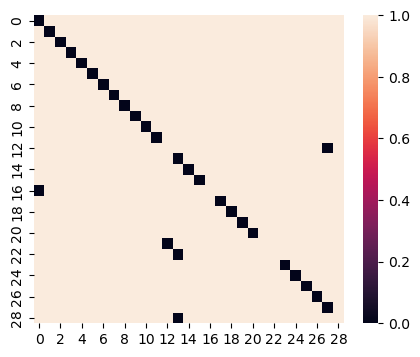

In [159]:
fig, ax = plt.subplots(figsize=(5,4))
heatmap(1-cmt/np.bincount(t), ax=ax)

In [154]:
print(np.c_[t,tp])

[[ 0  0]
 [ 1  1]
 [ 2  2]
 ...
 [26 26]
 [27 27]
 [28 13]]


In [160]:
model.save("modelo_cnn2C.h5")

In [26]:
tt.shape

(290, 61, 64)

In [27]:
tt1.shape

(290, 29)

1.0 0.0


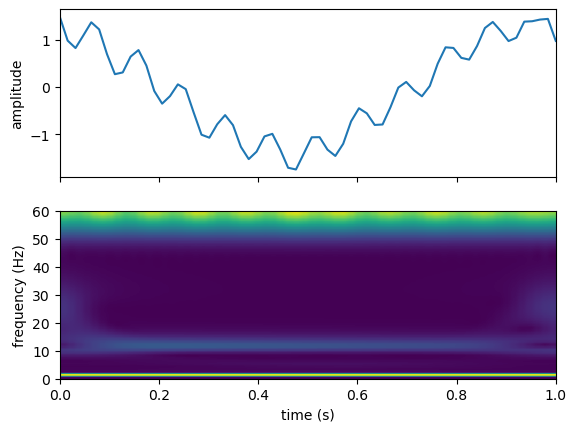

In [21]:
t = np.linspace(0, 1, 64)
w =  datosp[0,28]

fmin = 0  # Hz
fmax = 60  # Hz
df = 1./(t[-1]-t[0])  # sampling step in frequency domain (Hz)
print(df,t[0] )
fmin_samples = int(fmin/df)
fmax_samples = int(fmax/df)
stock = st.st(w, fmin_samples, fmax_samples)
extent = (t[0], t[-1], fmin, fmax)

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(t, w)
ax[0].set(ylabel='amplitude')
ax[1].imshow(np.abs(stock), origin='lower', extent=extent)
ax[1].axis('tight')
ax[1].set(xlabel='time (s)', ylabel='frequency (Hz)')
plt.show()